In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
___ = ''

In [6]:
pd.__version__

'0.24.2'

# Pandas DataFrames

## What is a DataFrame?

A DataFrame, simply put, is a **Table** of data.  It is a structure that contains multiple rows, each row containing the same labelled collection of data types.  For example, a DataFrame might look like this:

| (index) | Name | Age | Height | LikesIceCream |
| :---: | :--: | :--: | :--: | :--: |
| 0     | "Nick" | 22 | 3.4 | True |
| 1     | "Jenn" | 55 | 1.2 | True |
| 2     | "Joe"  | 25 | 2.2 | True |

Because each row contains the same data, DataFrames can also be thought of as a collection of same-length columns!

**Pandas** is a Python package that has a DataFrame class.  Using either the **DataFrame** class constructor or one of Pandas' many **read_()** functions, you can make your own DataFrame from a variety of sources.  

## Making DataFrames Directly

#### From a List of Dicts

Dicts are named collections.  If you have many of the same dicts in a list, the DataFrame constructor can convert it to a Dataframe:

In [7]:
friends = [
    {'Name': "Nick", "Age": 31, "Height": 2.9},
    {'Name': "Jenn", "Age": 55, "Height": 1.2},
    {"Name": "Joe",  "Age": 25, "Height": 1.2},
]
pd.DataFrame(friends)

,Age,Height,Name
0,31,2.9,Nick
1,55,1.2,Jenn
2,25,1.2,Joe


#### From a Dict of Lists

In [8]:
df = pd.DataFrame({
    'Name': ['Nick', 'Jenn', 'Joe'], 
    'Age': [31, 55, 25], 
    'Height': [2.9, 1.2, 1.2],
})
df

,Name,Age,Height
0,Nick,31,2.9
1,Jenn,55,1.2
2,Joe,25,1.2


#### From a List of Lists

if you have a collection of same-length sequences, you essentially have a rectangular data structure already!  All that's needed is to add some column labels.

In [9]:
friends = [
    ['Nick', 31, 2.9],
    ['Jenn', 55, 1.2],
    ['Joe',  25, 1.2],
]
pd.DataFrame(friends, columns=["Name", "Age", "Height"])

,Name,Age,Height
0,Nick,31,2.9
1,Jenn,55,1.2
2,Joe,25,1.2


#### From an empty DataFrame
If you prefer, you can also add columns one at a time, starting with an empty DataFrame:

In [9]:
df = pd.DataFrame()
df['Name'] = ['Nick', 'Jenn', 'Joe']
df['Age'] = [31, 55, 25]
df['Height'] = [2.9, 1.2, 1.2]
df

,Name,Age,Height
0,Nick,31,2.9
1,Jenn,55,1.2
2,Joe,25,1.2


### Exercise: Making DataFrames from Scratch

Please recreate the table below as a Dataframe using one of the approaches detailed above:

| Year | Product | Cost |
| :--: | :----:  | :--: |
| 2015 | Apples  | 0.35 |
| 2016 | Apples  | 0.45 |
| 2015 | Bananas | 0.75 |
| 2016 | Bananas | 1.10 |

Which approach did you prefer?  Why?

## Selecting Data

Pandas has a lot of flexibility in the number of syntaxes it supports.  For example, to select columns in a DataFrame:

```python
df['Column1']
df.Column1
```

Multiple Columns can also be selected by providing a list:

```python
df[['Column1', 'Column2']]
```

Rows are selected with the **iloc** and **loc** attributes:

```python
df.iloc[5]  # Used to get the "integer" index of the row.
df.loc['Row5']  # Used if rows are named.
```

Often, though, we just want to see the first rows, last rows, or some random sample of the rows:

| Method | Description |
| ---  | --- |
| df.head(5) | the first 5 rows |
| df.tail(5) | the last 5 rows |
| df.sample(5) | a random 5 rows |


### Exercises

Let's get a sample dataset and play around with it a bit.  We'll simply download the "Titanic" csv file and put it into a dataframe using the Pandas function **read_csv()**:

In [21]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Data Management Exercises**

Select the first 5 rows of the "sex" column

Select the last 3 rows of the "alive" column

Make a new dataframe containing just the "survived", "sex", and "age" columns:

Make a new dataframe contianing just the 10th, 15th, and 16th rows of the dataset.

## Summarizing / Aggregating Data in DataFrames

Pandas' Series and DataFrames are iterables, and can be given to any function that expects a list or Numpy Array, which allows them to be useful to many different libraries' functions.  For example, to compute a mean of a column:

```python
np.mean(df['Column1'])
```

You can also use the "pipe" method to call a function on the rows or columns of a DataFrame:

```python
df['Column1'].pipe(np.mean)
```

Finally, Pandas supplies many different aggregation functions as methods:

```python
df.mean()
```

#### Exercises

What is the mean ticket fare that the passengers paid on the titanic?  The median?

How many passengers does this dataset contain?

What class ticket did the 10th (index = 9) passenger in this dataset buy?

What proportion of the passengers were alone on the titanic?

How many different classes were on the titanic? (numpy.unique(), set(), pandas.unique()

How many men and women are in this dataset? (value_counts())

How many passengers are sitting in each class?

## Transforming Data: Broadcasting Element-Wise Operations

Any transformation function can be performed on each element of a column, or even all columns of a DataFrame.  Here are several options for this approach:

Numpy-like Operator syntax:
```python
df['Column1'] * 100
```

Functions-style syntax:
```python
np.sqrt(df['Column1'])
```

Special broadcasted-version of different classes' Methods:
```python
df['Column1'].str.upper()
```

Apply() methods:
```python
df['Column1'].apply(np.sqrt)
```

****Exercises****: Let's try some of these on the data:

In [18]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1. Get everyone's age if they were still alive today (hint: Titanic sunk in 1912)

2. make the class name title-cased (the first letter capitalized)

3. Make a columns called "not_survived", the opposite of the "survived" column


## Handling Missing Values

Missing values can be indicated with a None or np.nan value, like in Numpy.  Pandas Dataframes have several methods for detecting, removing, and replacing these values:

| method | description
| ---:  | :---- |
**isna()** | Returns True for each NaN |
**notna()** | Returns False for each NaN |
**dropna()** | Returns just the rows without any NaNs |



**Exercises**

What proportion of the "deck" column is missing data?

How many rows don't contain any missing data at all?

Make a dataframe with only the rows containing no missing data.

#### Imputation

You can also replace missing data with real values.

| method | description |
| ----: |  :---- |
| **fillna()** | Replaces the NaNs with values (provides lots of options) |
| **ffill()** | Replaces the Nans with the previous non-NaN value (equivalent to df.fillna(method='ffill') |
| **bfill()** | Replaces the Nans with the following non-NaN value (equivalent to df.fillna(method='bfill') |
| **interpolate()** | interpolates nans with previous and following values |


**Imputation Exercises**
Given the following dataframe, fill in the missing data using the fillna() or interpolate() methods:

In [31]:
data = pd.DataFrame({'time': [0.5, 1., 1.5, None, 2.5, 3., 3.5, None], 'value': [6, 4, 5, 8, None, 10, 11, None]})
data

,time,value
0,0.5,6.0
1,1.0,4.0
2,1.5,5.0
3,NaN,8.0
4,2.5,NaN
5,3.0,10.0
6,3.5,11.0
7,NaN,NaN


Replace all the missing "value" rows with zeros.

Replace the missing "time" rows with the previous value

In [37]:
data.value.ffill()

0     6.0
1     4.0
2     5.0
3     8.0
4     8.0
5    10.0
6    11.0
7    11.0
Name: value, dtype: float64

Replace all of the missing values with the data from the next row.  What do you notice when you do this with this dataset?

Linearly interpolate the missing data.  What is the result for this dataset?

Let's interpolate a bit more. make a scatter plot of "x" vs "y" for each of the DataFrames given, and use the options in DataFrame.interpolate to select the most appropriate interpolation method for the missing data in the "y" and "z" columns.

In [70]:
aa = pd.DataFrame()
aa['x'] = np.linspace(1, 4, 15)
aa['y'] = aa['x'] * 2
aa['z'] = aa['x'] ** 5
aa.y.iloc[[9, 2, 5, 10]] = None
aa.z.iloc[[3, 7, 8, 9, 10]] = None
aa.head()

,x,y,z
0,1.000000,2.000000,1.000000
1,1.214286,2.428571,2.640003
2,1.428571,NaN,5.949902
3,1.642857,3.285714,NaN
4,1.857143,3.714286,22.091569


1. Interpolate the "y" column from aa and show that it is a good-quality imputation. (bb, a copy of aa, has been provided to make it easier to try different techniques)

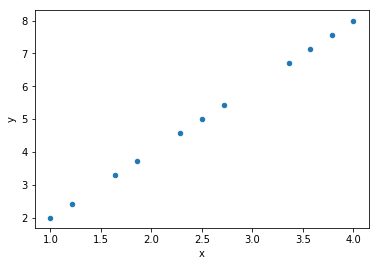

In [71]:
bb = aa.copy()
## Code goes here
bb.plot.scatter(x='x', y='y');

2. Interpolate the "z" column from aa and show that it is a good-quality imputation. (bb, a copy of aa, has been provided to make it easier to try different techniques)

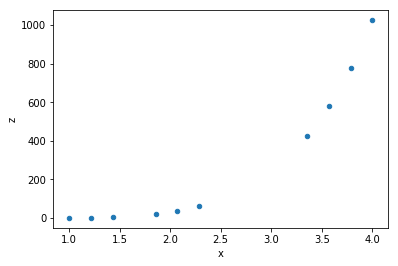

In [81]:
bb = aa.copy()
## Code goes here
bb.plot.scatter(x='x', y='z');

**Discussion**: What approaches to data imputation appear most often in your field?  What are some limitations to imputation that you can foresee using the pandas methods reviewed in this notebook?

## Querying/Filtering Data

To get rows based on their value, Pandas supports both Numpy's logical indexing for filtering rows and an SQL-like query string.  For example, to get all the rows of a dataframe that is positive for Column1:

```python
positive_rows = df['Column1'] > 0
df[positive_rows]
```

Often, this is done in a single line:

```python
df[df['Column1'] > 0]
```

And using the query() method:

```python
df.query('Column1 > 0')
```


#### Exercises
Let's go back to the Titanic dataset and do some data querying:

In [117]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1. What is ticket fare for the 1st class?  The 2nd? The 3rd?

2. Did the oldest passenger on the Titanic survive?

3. Was the youngest passenger on the Titanic alone?

4. How many passengers on the Titanic embarked from Cherbourg?

5. How much money did the Titanic make from passengers from Southampton? From Cherbourg?  From Queenstown?

6. Considering only those passengers older than 22, were there more Males travelling alone from Southampton or Females in Third class from Cherbourg?

## Plots

Pandas DataFrames have a plot module as an attribute!  It uses Matplotlib to make the plots, the plots can be modified by matplotlib functions:

```python
>>> df['1973'].plot.hist()
>>> plt.title('Data from 1973.')
```

Because the DataFrames are labelled, their plots are labeled, too:

```python
>>> df.plot.scatter(x='Time', y='Temperature')
```

**Exercises** Make at least 3 different visualizations, showing different aspects of the data:

Plot 1:

Plot 2:

Plot 3

## GroupBy Operations: Applying Aggregations to Groups of Data

Usually, you don't just want to get a single metric from a dataset--you want to compare that metric between differnt subgroups of your data. For example, you want the mean **monthly** temperature, or the maximum firing rate of **each neuron**, or the total income of **each country**, and so on.

The **groupby()** method lets you specify that an operation will be done on each *same-valued* row for a given column.  For example, to ask for the mean temperature by month:

```python
>>> df.groupby('month').temperature.mean()
```

To get the maxiumum firing rate of each neuron:

```python
>>> df.groupby('neuron_id').firing_rate.max()
```

You can also group by as many columns as you like, getting as many groups as unique combinations between the columns:

```python
>>> df.groupby(['year', 'month']).temperature.mean()
```

Groupby objects are **lazy**, meaning they don't start calculating anything until they know the full pipeline.  This approach is called the **"Split-Apply-Combine"** workflow.  You can get more info on it here: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


#### Exercises

Let's try this out on the Titanic Dataset!

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Example: What was the mean age, grouped by class?

In [67]:
df.groupby('class').age.mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

1. What was the median ticket fare for each class?

2. What was the survival rate for each class?

3. What was the survival rate for each sex?

4. What was the survival rate, broken down by both sex and class?

5. Which class tended to travel alone more often?  Did it matter where they were embarking from?

6. What was the ticket fare for each embarking city?

7. What was the median age of the survivors vs non-survivors, when sex is considered as a factor?